In [175]:
#render figures inline.
%matplotlib inline  

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")
seed = 42
np.random.seed(seed) 

# Exploratory Data Analysis

In [176]:
# from google.colab import drive
# drive.mount('/content/drive')

In [177]:
import datetime
now = datetime.datetime.now()
timestamp = now.strftime("%Y-%m-%d")

In [178]:
# dir = '/content/drive/MyDrive/Work/Omdena/Ethiopia NLP/project/Ethiopian-languages-DS/'
# data_dir = dir + 'data/'
# reports_dir = dir + 'reports/' + timestamp + '/'

In [179]:
dir = '../'
data_dir = dir + 'data/'
reports_dir = dir + 'reports/' + timestamp + '/'

In [180]:
import os
if not os.path.exists(reports_dir):
    os.makedirs(reports_dir)

In [181]:
path = data_dir + 'Amharic_corpus_merged_2023-04-16.csv'
data = pd.read_csv(path)

data = shuffle(data)
data.head()

,article,category
57065,\n\n\nማክሰኞ ሰኔ 7 ቀን 2014 ዓ.ም. በሕዝብ ተወካዮች ምክር ቤት...,Politics
9169,አዲስ አበባ ፣ ሚያዚያ 24 ፣ 2012 (ኤፍ ቢ ሲ) ገቢው የኮሮና ቫይረ...,Local News
9807,ጎንደር ላይ በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ...,Sports
60678,\n\n\nየሕዝብ ተወካዮች ምክር ቤት ‹‹በሕግ ተመራቂ ተማሪዎች የመውጫ ...,Politics
44025,በኢትዮጵያ ፕሪምየር ሊግ 16ኛ ሳምንት ድሬዳዋ ላይ ድሬዳዋ ከተማ ከ ኢት...,Sports


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61915 entries, 57065 to 56422
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   61915 non-null  object
 1   category  61915 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [183]:
data.category.value_counts()

Local News            20674
Politics              14481
Sports                10411
Business               9170
International News     6543
Entertainment           635
Others                    1
Name: category, dtype: int64

In [184]:
data.category.unique()

array(['Politics', 'Local News', 'Sports', 'Business',
       'International News', 'Entertainment', 'Others'], dtype=object)

Those are:

['Politics', 'Local News', 'Sports', 'International News', 'Business', 'Entertainment']

In [185]:
# df = data.copy()
# d_replace = {'ፖለቲካ':'Politics', 'ሀገር አቀፍ ዜና':'Local News', 'ስፖርት':'Sports', 'ዓለም አቀፍ ዜና':'International News', 'ቢዝነስ':'Business', 'መዝናኛ':'Entertainment', np.nan:'Others'}
# df.category = df.category.map(d_replace)
# df.sample(10)

In [186]:
# cat_labels = df.category.unique()
# cat_labels

In [187]:
# data = df.copy()    # back to normal dataframe

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61915 entries, 57065 to 56422
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   61915 non-null  object
 1   category  61915 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [189]:
data.isna().sum()

article     0
category    0
dtype: int64

In [190]:
# data = data.dropna(subset=['article'])

In [191]:
data.category.value_counts()

Local News            20674
Politics              14481
Sports                10411
Business               9170
International News     6543
Entertainment           635
Others                    1
Name: category, dtype: int64

We will remove Others and Entertainment due to problems in inbalanced data.

In [192]:
df = data[(data.category != 'Entertainment') & (data.category != 'Others')]
df.category.unique()

array(['Politics', 'Local News', 'Sports', 'Business',
       'International News'], dtype=object)

In [193]:
data = df.copy()

In [194]:
data['word_len'] = data['article'].str.split().str.len()
data.head()

,article,category,word_len
57065,\n\n\nማክሰኞ ሰኔ 7 ቀን 2014 ዓ.ም. በሕዝብ ተወካዮች ምክር ቤት...,Politics,997
9169,አዲስ አበባ ፣ ሚያዚያ 24 ፣ 2012 (ኤፍ ቢ ሲ) ገቢው የኮሮና ቫይረ...,Local News,59
9807,ጎንደር ላይ በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ...,Sports,530
60678,\n\n\nየሕዝብ ተወካዮች ምክር ቤት ‹‹በሕግ ተመራቂ ተማሪዎች የመውጫ ...,Politics,374
44025,በኢትዮጵያ ፕሪምየር ሊግ 16ኛ ሳምንት ድሬዳዋ ላይ ድሬዳዋ ከተማ ከ ኢት...,Sports,254


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61279 entries, 57065 to 56422
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   61279 non-null  object
 1   category  61279 non-null  object
 2   word_len  61279 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [196]:
data.word_len.mean()

297.49873529267774

# character level normalization

Amharic has characters wich have the same sound that can be interchangably used.

for example letters 'ሃ','ኅ','ኃ','ሐ','ሓ','ኻ','ሀ' have the same sound so we change them to 'ሀ' 

In [197]:
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalize_char_level_missmatch(input_token):
    rep=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep=re.sub('[ሑኁዅ]','ሁ',rep)
    rep=re.sub('[ኂሒኺ]','ሂ',rep)
    rep=re.sub('[ኌሔዄ]','ሄ',rep)
    rep=re.sub('[ሕኅ]','ህ',rep)
    rep=re.sub('[ኆሖኾ]','ሆ',rep)
    rep=re.sub('[ሠ]','ሰ',rep)
    rep=re.sub('[ሡ]','ሱ',rep)
    rep=re.sub('[ሢ]','ሲ',rep)
    rep=re.sub('[ሣ]','ሳ',rep)
    rep=re.sub('[ሤ]','ሴ',rep)
    rep=re.sub('[ሥ]','ስ',rep)
    rep=re.sub('[ሦ]','ሶ',rep)
    rep=re.sub('[ዓኣዐ]','አ',rep)
    rep=re.sub('[ዑ]','ኡ',rep)
    rep=re.sub('[ዒ]','ኢ',rep)
    rep=re.sub('[ዔ]','ኤ',rep)
    rep=re.sub('[ዕ]','እ',rep)
    rep=re.sub('[ዖ]','ኦ',rep)
    rep=re.sub('[ጸ]','ፀ',rep)
    rep=re.sub('[ጹ]','ፁ',rep)
    rep=re.sub('[ጺ]','ፂ',rep)
    rep=re.sub('[ጻ]','ፃ',rep)
    rep=re.sub('[ጼ]','ፄ',rep)
    rep=re.sub('[ጽ]','ፅ',rep)
    rep=re.sub('[ጾ]','ፆ',rep)

    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
    rep=re.sub('(ሉ[ዋአ])','ሏ',rep)
    rep=re.sub('(ሙ[ዋአ])','ሟ',rep)
    rep=re.sub('(ቱ[ዋአ])','ቷ',rep)
    rep=re.sub('(ሩ[ዋአ])','ሯ',rep)
    rep=re.sub('(ሱ[ዋአ])','ሷ',rep)
    rep=re.sub('(ሹ[ዋአ])','ሿ',rep)
    rep=re.sub('(ቁ[ዋአ])','ቋ',rep)
    rep=re.sub('(ቡ[ዋአ])','ቧ',rep)
    rep=re.sub('(ቹ[ዋአ])','ቿ',rep)
    rep=re.sub('(ሁ[ዋአ])','ኋ',rep)
    rep=re.sub('(ኑ[ዋአ])','ኗ',rep)
    rep=re.sub('(ኙ[ዋአ])','ኟ',rep)
    rep=re.sub('(ኩ[ዋአ])','ኳ',rep)
    rep=re.sub('(ዙ[ዋአ])','ዟ',rep)
    rep=re.sub('(ጉ[ዋአ])','ጓ',rep)
    rep=re.sub('(ደ[ዋአ])','ዷ',rep)
    rep=re.sub('(ጡ[ዋአ])','ጧ',rep)
    rep=re.sub('(ጩ[ዋአ])','ጯ',rep)
    rep=re.sub('(ጹ[ዋአ])','ጿ',rep)
    rep=re.sub('(ፉ[ዋአ])','ፏ',rep)
    rep=re.sub('[ቊ]','ቁ',rep) #ቁ can be written as ቊ
    rep=re.sub('[ኵ]','ኩ',rep) #ኩ can be also written as ኵ  
    return rep


In [198]:
data['article'] = data['article'].str.replace(r'[^\w\s]','')

In [199]:
data['article'] = data['article'].apply(lambda x: normalize_char_level_missmatch(x))

In [200]:
n_data = data[['article','category']]
n_data.head()

,article,category
57065,\n\n\nማክሰኞ ሰኔ 7 ቀን 2014 አም በህዝብ ተወካዮች ምክር ቤት 1...,Politics
9169,አዲስ አበባ ሚያዚያ 24 2012 ኤፍ ቢ ሲ ገቢው የኮሮና ቫይረስን ለ...,Local News
9807,ጎንደር ላይ በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ...,Sports
60678,\n\n\nየህዝብ ተወካዮች ምክር ቤት በህግ ተመራቂ ተማሪዎች የመውጫ ፈተ...,Politics
44025,በኢትዮጵያ ፕሪምየር ሊግ 16ኛ ሳምንት ድሬዳዋ ላይ ድሬዳዋ ከተማ ከ ኢት...,Sports


## Tokenization and Segmentation

[reference]('https://github.com/uhh-lt/amharicprocessor')

In [201]:
# pip install amseg

In [202]:
# from amseg.amharicSegmenter import AmharicSegmenter
# sent_punct = []
# word_punct = []
# segmenter = AmharicSegmenter(sent_punct,word_punct)
# words = segmenter.amharic_tokenizer("እአበበ በሶ በላ።")
# sentences = segmenter.tokenize_sentence("እአበበ በሶ በላ። ከበደ ጆንያ፤ ተሸከመ፡!ለምን?")

In [203]:
n_data['article'][0]

'አባስ ሁሴን በዋሺንግተን ዲሲ እና አካባቢዎ ከ20 አመት በላይ የኖረ ትውልደ ኢትዮጵያዊ ነው አባስ ከሚታወቅበት የንግድ እንቅስቃሴ በተጨማሪ ትውልደኢትዮጵያዊያንን በሚያግዙ የበጎ አድራጎት ስራዎችም ንቁ ተሳታፊነቱ ይታወቃል የኮቪድ 19 መስፋፋትን ተከትሎ አባስ እንደለመደው ከኢትዮጵያ ዲያስፖራ ሙስሊም ማህበረሰብ ጋር ተሰባስቦ የኢድ አል አድሀን በአል ማክበር ባይችልም ያለፉ በአሎችን ትዝታዎች እየዘከረ ከቤተሰቦቹ ጋር በአሉን ለማሳለፍ እንደጣረ ለአሜሪካ ድምፅ ራዲዮ ተናግሯል\n'

In [204]:
from nltk.tokenize import word_tokenize

text = n_data['article'][0]
word_token = word_tokenize(text)
word_token

['አባስ',
 'ሁሴን',
 'በዋሺንግተን',
 'ዲሲ',
 'እና',
 'አካባቢዎ',
 'ከ20',
 'አመት',
 'በላይ',
 'የኖረ',
 'ትውልደ',
 'ኢትዮጵያዊ',
 'ነው',
 'አባስ',
 'ከሚታወቅበት',
 'የንግድ',
 'እንቅስቃሴ',
 'በተጨማሪ',
 'ትውልደኢትዮጵያዊያንን',
 'በሚያግዙ',
 'የበጎ',
 'አድራጎት',
 'ስራዎችም',
 'ንቁ',
 'ተሳታፊነቱ',
 'ይታወቃል',
 'የኮቪድ',
 '19',
 'መስፋፋትን',
 'ተከትሎ',
 'አባስ',
 'እንደለመደው',
 'ከኢትዮጵያ',
 'ዲያስፖራ',
 'ሙስሊም',
 'ማህበረሰብ',
 'ጋር',
 'ተሰባስቦ',
 'የኢድ',
 'አል',
 'አድሀን',
 'በአል',
 'ማክበር',
 'ባይችልም',
 'ያለፉ',
 'በአሎችን',
 'ትዝታዎች',
 'እየዘከረ',
 'ከቤተሰቦቹ',
 'ጋር',
 'በአሉን',
 'ለማሳለፍ',
 'እንደጣረ',
 'ለአሜሪካ',
 'ድምፅ',
 'ራዲዮ',
 'ተናግሯል']

## Stop Words

In [205]:
sw_path = data_dir + 'consolidated_stop_words_2023.csv'

sw_list = []
with open(sw_path, mode='r', encoding='utf-8') as f:
    reader = f.readlines()
    for line in  reader:
        sw_list.append(line.strip())

#skip the first line (header)
sw_list = sw_list[1:]
sw_list[:10]

['ይኖረዋል',
 'እላችኋለሁ',
 'አጠናቀዋል',
 'አልቀረበም',
 'ሆይ',
 'አልታየም',
 'አስገብተዋል',
 'አትቷል',
 'ይከፍታል',
 'የለም']

In [206]:
len(sw_list)

714

In [207]:
stopwords = sw_list

def clean_text(text):
    from nltk.tokenize import word_tokenize
    word_token = word_tokenize(text)
    tokens_without_punc = [w for w in word_token if w.isalnum()] # .isalnum() for number and text
    token_without_sw = [t for t in tokens_without_punc if t not in stopwords] # if you make a sentiment analysis , you can't remove 
                                                                           # negative auxiliary verb
    return ' '.join(token_without_sw)

clean_text(n_data['article'][0])

'አባስ ሁሴን በዋሺንግተን ዲሲ አካባቢዎ ከ20 አመት የኖረ ትውልደ ኢትዮጵያዊ አባስ ከሚታወቅበት የንግድ እንቅስቃሴ በተጨማሪ ትውልደኢትዮጵያዊያንን በሚያግዙ የበጎ አድራጎት ስራዎችም ንቁ ተሳታፊነቱ የኮቪድ 19 መስፋፋትን ተከትሎ አባስ እንደለመደው ከኢትዮጵያ ዲያስፖራ ሙስሊም ማህበረሰብ ተሰባስቦ የኢድ አድሀን በአል ማክበር ባይችልም ያለፉ በአሎችን ትዝታዎች እየዘከረ ከቤተሰቦቹ በአሉን ለማሳለፍ እንደጣረ ለአሜሪካ ድምፅ ራዲዮ'

In [208]:
n_data['article'] = n_data['article'].apply(clean_text)

In [209]:
n_data['article'][:3]

57065    ማክሰኞ ሰኔ 7 ቀን 2014 በህዝብ ተወካዮች ምክር ቤት 13ኛ መደበኛ ስ...
9169     አዲስ አበባ ሚያዚያ 24 2012 ኤፍ ገቢው የኮሮና ቫይረስን ለመከላከል ...
9807     ጎንደር በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ ቃሲ...
Name: article, dtype: object

In [210]:
text,label = n_data['article'].values , n_data['category'].values

## Model Evaluation

In [211]:
# from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [212]:
from sklearn.metrics import confusion_matrix, classification_report
def print_eval(title, model, X_train, X_test, y_train, y_test):

    print(title)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))

    print("Test_Set")
    print(classification_report(y_test, y_pred)) #, target_names=cat_labels))

    print("Train_Set")
    print(classification_report(y_train, y_pred_train)) #, target_names=cat_labels))
    

# Count Vectorizer

In [213]:
method = 'Count_Vectorizer'

In [214]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(analyzer='word',max_features=1000, ngram_range=(1, 3))
X = matrix.fit_transform(text).toarray()
Y = label.copy()
X, Y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
        'Business'], dtype=object))

In [215]:
# unique_label = list(set(label))
# Y= []
# for i in label:
#     Y.append(unique_label.index(i))

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)

## Gaussian Naive Bayes 

In [217]:
model_name = 'GaussianNB'

In [218]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6413185378590078

In [219]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

GaussianNB
[[1358   58  306   95   17]
 [   8 1191   62   28   20]
 [ 325 1137 2009  454  210]
 [ 198  426  896 1340   36]
 [  19   78   18    5 1962]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.71      0.74      0.73      1834
International News       0.41      0.91      0.57      1309
        Local News       0.61      0.49      0.54      4135
          Politics       0.70      0.46      0.56      2896
            Sports       0.87      0.94      0.91      2082

          accuracy                           0.64     12256
         macro avg       0.66      0.71      0.66     12256
      weighted avg       0.67      0.64      0.64     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.70      0.73      0.71      7336
International News       0.42      0.92      0.58      5234
        Local News       0.61      0.50      0.55     16539
          Politics       0.71      0.47      

In [220]:
cnt = 0
def save_graph(viz):
    global cnt
    cnt += 1
    savepath = reports_dir + model_name + "_prec-recall(" + str(round(score, 2)).replace('0.','') + ')_' + str(cnt) + '.svg'
    viz.ax.figure.savefig(savepath, format='svg', bbox_inches='tight')
    print(savepath)

../reports/2023-05-02/GaussianNB_prec-recall(49)_1.svg


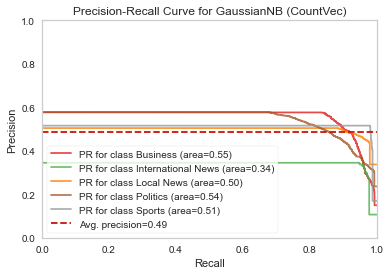

<AxesSubplot:title={'center':'Precision-Recall Curve for GaussianNB (CountVec)'}, xlabel='Recall', ylabel='Precision'>

In [221]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    GaussianNB(),
    classes=classifier.classes_,
    title="Precision-Recall Curve for GaussianNB (CountVec)", 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)

save_graph(viz)
viz.show()

In [222]:
score

0.4874362559437355

We will specify a feature to increase success rate.

In [223]:
feature = 'Business'

In [224]:
import os
from sklearn.metrics import f1_score, recall_score, classification_report

def store_result(method, model_name, y, y_pred, prec_recall_score):
  global reports_dir
  
  d = {"Method":[], "Model":[], "Weighted_Accuracy":[], "Prec_Recall_score":[]}
  d["Method"].append(method)
  d["Model"].append(model_name)

  report = classification_report(y, y_pred)
  weighted_accuracy = float(report.split()[-2])

  d['Weighted_Accuracy'].append(weighted_accuracy)
  d["Prec_Recall_score"].append(prec_recall_score)

  df = pd.DataFrame(d)
  filename = reports_dir + 'Results' + '.csv'

  if not os.path.isfile(filename):
    df.to_csv(filename, header=d.keys(), index=False)  
  else:         
    df.to_csv(filename, mode='a', header=False, index=False)

In [226]:
store_result(method, model_name, y_test, y_pred, score)

## Multinomial NB

In [227]:
model_name = 'Multinomial NB'

In [228]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=3)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7306625326370757

In [229]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

Multinomial NB
[[1468   28  219  117    2]
 [  62  959  116  151   21]
 [ 316  320 2796  676   27]
 [ 212  274  600 1801    9]
 [   9   23  104   15 1931]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.71      0.80      0.75      1834
International News       0.60      0.73      0.66      1309
        Local News       0.73      0.68      0.70      4135
          Politics       0.65      0.62      0.64      2896
            Sports       0.97      0.93      0.95      2082

          accuracy                           0.73     12256
         macro avg       0.73      0.75      0.74     12256
      weighted avg       0.74      0.73      0.73     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.71      0.78      0.74      7336
International News       0.60      0.77      0.67      5234
        Local News       0.73      0.66      0.69     16539
          Politics       0.65      0.63  

In [230]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = MultinomialNB(alpha=3)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

In [231]:
classifier.classes_

array(['Business', 'International News', 'Local News', 'Politics',
       'Sports'], dtype='<U18')

../reports/2023-05-02/Multinomial NB_prec-recall(74)_2.svg


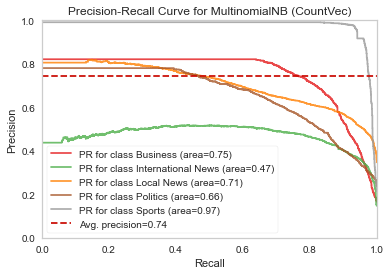

<AxesSubplot:title={'center':'Precision-Recall Curve for MultinomialNB (CountVec)'}, xlabel='Recall', ylabel='Precision'>

In [232]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    title="Precision-Recall Curve for MultinomialNB (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [233]:
score 

0.7445786021658769

In [234]:
store_result(method, model_name, y_test, y_pred, score)

## Logistic  Regression

In [235]:
model_name = 'Logistic Reg'

In [236]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7990372062663186

In [237]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

Logistic Reg
[[1380   25  246  177    6]
 [   8 1042  198   51   10]
 [ 132  273 3349  348   33]
 [ 136  131  566 2051   12]
 [   3   60   46    2 1971]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.83      0.75      0.79      1834
International News       0.68      0.80      0.73      1309
        Local News       0.76      0.81      0.78      4135
          Politics       0.78      0.71      0.74      2896
            Sports       0.97      0.95      0.96      2082

          accuracy                           0.80     12256
         macro avg       0.80      0.80      0.80     12256
      weighted avg       0.80      0.80      0.80     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.84      0.78      0.81      7336
International News       0.74      0.83      0.78      5234
        Local News       0.78      0.83      0.80     16539
          Politics       0.80      0.74    

In [238]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = LogisticRegression(C=0.4, max_iter=1000)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

../reports/2023-05-02/Logistic Reg_prec-recall(87)_3.svg


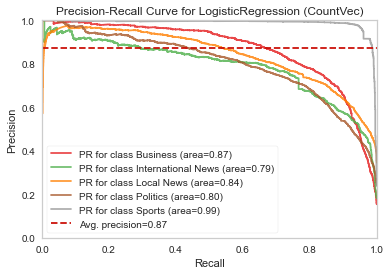

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression (CountVec)'}, xlabel='Recall', ylabel='Precision'>

In [239]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    title="Precision-Recall Curve for LogisticRegression (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [240]:
score 

0.8740175021648359

In [241]:
store_result(method, model_name, y_test, y_pred, score)

## SVM

In [242]:
model_name = 'SVM C=1'

In [243]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(C=0.2)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7983844647519582

In [244]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

SVM C=1
[[1388   19  260  161    6]
 [   9  972  268   50   10]
 [ 126  216 3409  355   29]
 [ 138  110  593 2045   10]
 [   0   17   89    5 1971]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.84      0.76      0.79      1834
International News       0.73      0.74      0.74      1309
        Local News       0.74      0.82      0.78      4135
          Politics       0.78      0.71      0.74      2896
            Sports       0.97      0.95      0.96      2082

          accuracy                           0.80     12256
         macro avg       0.81      0.80      0.80     12256
      weighted avg       0.80      0.80      0.80     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.85      0.77      0.81      7336
International News       0.80      0.78      0.79      5234
        Local News       0.76      0.84      0.80     16539
          Politics       0.80      0.75      0.7

In [245]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = LinearSVC(C=0.2)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

../reports/2023-05-02/SVM C=1_prec-recall(87)_4.svg


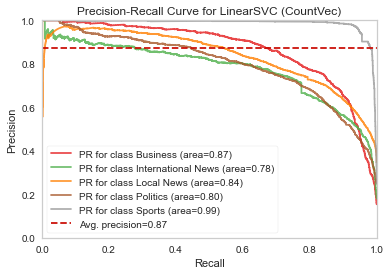

<AxesSubplot:title={'center':'Precision-Recall Curve for LinearSVC (CountVec)'}, xlabel='Recall', ylabel='Precision'>

In [246]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LinearSVC(C=0.2),
    title="Precision-Recall Curve for LinearSVC (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [247]:
score 

0.8710921691970535

In [248]:
store_result(method, model_name, y_test, y_pred, score)

## Random Forest

In [249]:
model_name = 'RandomForest'

In [250]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8098074412532638

In [251]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

RandomForest
[[1451   10  260  111    2]
 [  14  751  463   62   19]
 [ 123  103 3539  335   35]
 [  90   61  532 2206    7]
 [   0    1  100    3 1978]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.86      0.79      0.83      1834
International News       0.81      0.57      0.67      1309
        Local News       0.72      0.86      0.78      4135
          Politics       0.81      0.76      0.79      2896
            Sports       0.97      0.95      0.96      2082

          accuracy                           0.81     12256
         macro avg       0.84      0.79      0.81     12256
      weighted avg       0.82      0.81      0.81     12256

Train_Set
                    precision    recall  f1-score   support

          Business       1.00      0.96      0.98      7336
International News       0.96      0.83      0.89      5234
        Local News       0.89      0.99      0.94     16539
          Politics       1.00      0.95    

There is an overfit in the model. We will try to find best parameters to overcome overfitting.

In [252]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1600, 
                                    max_depth=20, 
                                    random_state = 42, 
                                    n_jobs = -1)

"""
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
"""

classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

RandomForest
[[1361    0  353  120    0]
 [  21  269  918   80   21]
 [ 109   35 3655  307   29]
 [  73    4  896 1914    9]
 [   0    0  125    6 1951]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.87      0.74      0.80      1834
International News       0.87      0.21      0.33      1309
        Local News       0.61      0.88      0.73      4135
          Politics       0.79      0.66      0.72      2896
            Sports       0.97      0.94      0.95      2082

          accuracy                           0.75     12256
         macro avg       0.82      0.69      0.71     12256
      weighted avg       0.78      0.75      0.73     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.98      0.80      0.88      7336
International News       0.93      0.26      0.41      5234
        Local News       0.66      0.96      0.78     16539
          Politics       0.89      0.75    

In [253]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

../reports/2023-05-02/RandomForest_prec-recall(86)_5.svg


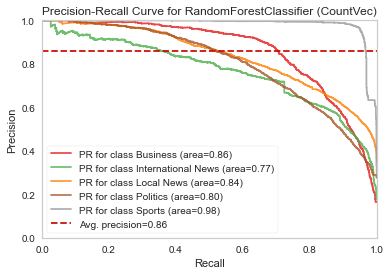

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier (CountVec)'}, xlabel='Recall', ylabel='Precision'>

In [254]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    RandomForestClassifier(1600, 
                           max_depth=15, 
                           random_state = 42, n_jobs = -1),
    title="Precision-Recall Curve for RandomForestClassifier (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [255]:
score 

0.8568400563966576

In [256]:
store_result(method, model_name, y_test, y_pred, score)

## Adaboost

In [257]:
model_name = 'Adaboost'

In [258]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators= 500, random_state = 42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6907637075718016

In [259]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

Adaboost
[[1349   52  272  159    2]
 [  22  978  232   67   10]
 [ 353  431 3001  312   38]
 [ 219  469 1007 1195    6]
 [   0   17  116    6 1943]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.69      0.74      0.71      1834
International News       0.50      0.75      0.60      1309
        Local News       0.65      0.73      0.68      4135
          Politics       0.69      0.41      0.52      2896
            Sports       0.97      0.93      0.95      2082

          accuracy                           0.69     12256
         macro avg       0.70      0.71      0.69     12256
      weighted avg       0.70      0.69      0.69     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.68      0.72      0.70      7336
International News       0.52      0.76      0.62      5234
        Local News       0.65      0.73      0.68     16539
          Politics       0.69      0.41      0.

In [260]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

../reports/2023-05-02/Adaboost_prec-recall(88)_6.svg


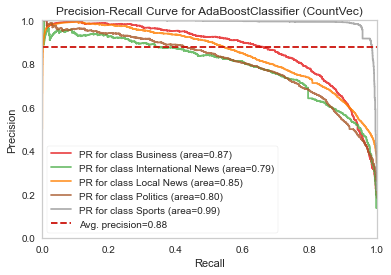

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier (CountVec)'}, xlabel='Recall', ylabel='Precision'>

In [261]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    title="Precision-Recall Curve for AdaBoostClassifier (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [262]:
score 

0.8762925891549938

In [263]:
store_result(method, model_name, y_test, y_pred, score)

## XGBoost

In [264]:
model_name = 'XGBoost'

In [265]:
Y

array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
       'Business'], dtype=object)

In [266]:
np.unique(Y)

array(['Business', 'International News', 'Local News', 'Politics',
       'Sports'], dtype=object)

In [267]:
d_replace = { "Business": 0,
    "International News": 1,
            "Local News": 2,
              "Politics": 3,
                "Sports": 4,
                # "Entertainment": 5,
                # "Others": 6 
                }

Y_ = pd.Series(Y).map(d_replace).to_numpy(dtype=int)
np.unique(Y_)

array([0, 1, 2, 3, 4])

In [268]:
# df = data.copy()

# df.category = Y_
# # df.category = df.category.astype(int)
# df.sample(10)

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_     , stratify=Y_, test_size=0.2, random_state=42)

In [270]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state=42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

[03:51:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8330613577023499

In [271]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

XGBoost
[[1497   13  207  115    2]
 [  14  990  236   58   11]
 [ 155  172 3454  326   28]
 [ 120   85  400 2284    7]
 [   0   11   84    2 1985]]
Test_Set
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1834
           1       0.78      0.76      0.77      1309
           2       0.79      0.84      0.81      4135
           3       0.82      0.79      0.80      2896
           4       0.98      0.95      0.96      2082

    accuracy                           0.83     12256
   macro avg       0.84      0.83      0.83     12256
weighted avg       0.83      0.83      0.83     12256

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7336
           1       0.85      0.85      0.85      5234
           2       0.86      0.91      0.88     16539
           3       0.91      0.88      0.90     11585
           4       0.99      0.96      0.98      8329

    accuracy     

We have an overfitting here. The result of test set is lower than train set. Accuracy has 10 percent difference which means overfitting.

In [272]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# # scoring = {'accuracy': make_scorer(accuracy_score),
# #             'precision-neg': make_scorer(precision_score, average=None, labels=features),
# #             'recall-neg': make_scorer(recall_score, average=None, labels = features),
# #             'f1-neg': make_scorer(f1_score, average=None, labels = features)}


# param_grid = {"n_estimators":[50, 100],
#              'max_depth':[3,4], 
#              "learning_rate": [0.1, 0.2],
#              "subsample":[0.5, 0.8], 
#              "colsample_bytree":[0.5,0.7]}
# njobs = 2
# xgb_model = XGBClassifier(random_state=42)
# xgb_grid = GridSearchCV(xgb_model, param_grid=param_grid, scoring="f1", refit=False, verbose=2, n_jobs = njobs)
# xgb_grid.fit(X_train, y_train)
# xgb_grid.best_params_

In [273]:
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth=3, random_state=42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

[03:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost
[[1421   24  237  150    2]
 [  21  931  283   66    8]
 [ 143  250 3366  348   28]
 [ 156  133  496 2104    7]
 [   0   56   57    8 1961]]
Test_Set
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1834
           1       0.67      0.71      0.69      1309
           2       0.76      0.81      0.79      4135
           3       0.79      0.73      0.76      2896
           4       0.98      0.94      0.96      2082

    accuracy                           0.80     12256
   macro avg       0.80      0.79      0.80     12256
weighted avg       0.80      0.80      0.80     12256

Train_Set
              precision    recal

In [274]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = XGBClassifier(max_depth=3, random_state=42)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

In [275]:
cnt = 0

[03:58:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:00:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

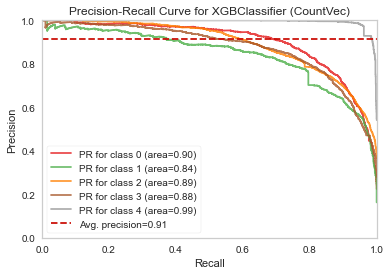

<AxesSubplot:title={'center':'Precision-Recall Curve for XGBClassifier (CountVec)'}, xlabel='Recall', ylabel='Precision'>

In [276]:
from yellowbrick.classifier import PrecisionRecallCurve

fig, ax = plt.subplots()

# Object oriented approach
# viz = Visualizer(ax=ax)

viz = PrecisionRecallCurve(
    XGBClassifier(random_state=42),
    title="Precision-Recall Curve for XGBClassifier (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1",
    ax=ax
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [277]:
score 

0.9127336520467294

In [278]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

In [279]:
store_result(method, model_name, y_test, y_pred, score)

# TF-IDF

In [339]:
method = 'TF-IDF'

In [340]:
from sklearn.feature_extraction.text import TfidfVectorizer
matrix = TfidfVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
X2 = matrix.fit_transform(text).toarray()
Y2 = label.copy()
X2, Y2

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.04682348, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
        'Business'], dtype=object))

In [341]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, stratify=Y2, test_size=0.2, random_state=42)

## Gaussian Naive Bayes 

In [342]:
model_name = "GaussianNB"

In [343]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6906005221932114

In [344]:
print_eval(model_name, classifier,X_train, X_test, y_train, y_test)

GaussianNB
[[1587   31   77  129   10]
 [  60 1034   53  124   38]
 [ 655  574 1805 1015   86]
 [ 318  310  193 2037   38]
 [   6   31   41    3 2001]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.60      0.87      0.71      1834
International News       0.52      0.79      0.63      1309
        Local News       0.83      0.44      0.57      4135
          Politics       0.62      0.70      0.66      2896
            Sports       0.92      0.96      0.94      2082

          accuracy                           0.69     12256
         macro avg       0.70      0.75      0.70     12256
      weighted avg       0.73      0.69      0.68     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.60      0.86      0.71      7336
International News       0.54      0.83      0.66      5234
        Local News       0.83      0.43      0.57     16539
          Politics       0.62      0.71      

In [286]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = GaussianNB()
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

../reports/2023-05-02/GaussianNB_prec-recall(51)_10.svg


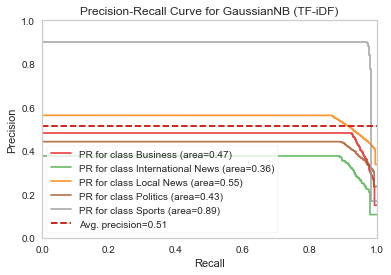

<AxesSubplot:title={'center':'Precision-Recall Curve for GaussianNB (TF-iDF)'}, xlabel='Recall', ylabel='Precision'>

In [345]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    GaussianNB(),
    title="Precision-Recall Curve for GaussianNB (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [346]:
score 

0.5148820778796263

In [347]:
store_result(method, model_name, y_test, y_pred, score)

## Multinomial NB

In [290]:
model_name = 'MultinomialNB'

In [291]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=3)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7344973890339426

In [292]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

MultinomialNB
[[1429   11  259  133    2]
 [  64  647  339  236   23]
 [ 285  102 3129  594   25]
 [ 186  138  689 1875    8]
 [  10    9  125   16 1922]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.72      0.78      0.75      1834
International News       0.71      0.49      0.58      1309
        Local News       0.69      0.76      0.72      4135
          Politics       0.66      0.65      0.65      2896
            Sports       0.97      0.92      0.95      2082

          accuracy                           0.73     12256
         macro avg       0.75      0.72      0.73     12256
      weighted avg       0.74      0.73      0.73     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.72      0.77      0.74      7336
International News       0.74      0.52      0.61      5234
        Local News       0.68      0.75      0.71     16539
          Politics       0.65      0.65   

In [293]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = MultinomialNB(alpha=3)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

../reports/2023-05-02/MultinomialNB_prec-recall(81)_3.svg


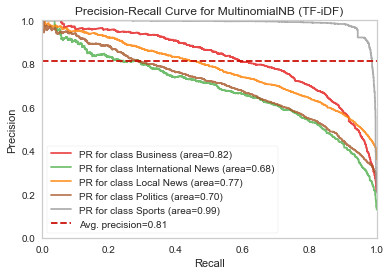

<AxesSubplot:title={'center':'Precision-Recall Curve for MultinomialNB (TF-iDF)'}, xlabel='Recall', ylabel='Precision'>

In [294]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    title="Precision-Recall Curve for MultinomialNB (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [295]:
score 

0.8138716854973431

In [296]:
store_result(method, model_name, y_test, y_pred, score)

## Logistic  Regression

In [297]:
model_name = 'LogisticReg'

In [298]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8002610966057441

In [299]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

LogisticReg
[[1445   13  214  157    5]
 [  16  942  243   90   18]
 [ 165  158 3331  451   30]
 [ 157   86  535 2110    8]
 [   2    7   85    8 1980]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.81      0.79      0.80      1834
International News       0.78      0.72      0.75      1309
        Local News       0.76      0.81      0.78      4135
          Politics       0.75      0.73      0.74      2896
            Sports       0.97      0.95      0.96      2082

          accuracy                           0.80     12256
         macro avg       0.81      0.80      0.81     12256
      weighted avg       0.80      0.80      0.80     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.80      0.79      0.79      7336
International News       0.81      0.74      0.77      5234
        Local News       0.77      0.81      0.79     16539
          Politics       0.76      0.75     

In [300]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = ['Business']
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = LogisticRegression(C=0.4, max_iter=1000)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

../reports/2023-05-02/LogisticReg_prec-recall(88)_4.svg


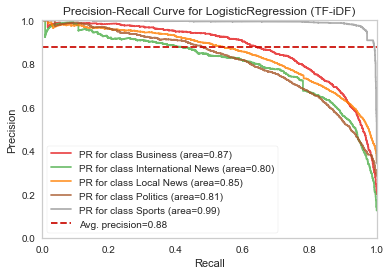

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression (TF-iDF)'}, xlabel='Recall', ylabel='Precision'>

In [301]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    title="Precision-Recall Curve for LogisticRegression (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [302]:
score 

0.8769261101725879

In [303]:
store_result(method, model_name, y_test, y_pred, score)

## SVM

In [304]:
model_name = 'SVM'

In [305]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(C=0.1)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7992819843342036

In [306]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

SVM
[[1455   16  214  144    5]
 [  24  934  248   86   17]
 [ 177  165 3293  464   36]
 [ 171   90  498 2128    9]
 [   2    7   78    9 1986]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.80      0.79      0.79      1834
International News       0.77      0.71      0.74      1309
        Local News       0.76      0.80      0.78      4135
          Politics       0.75      0.73      0.74      2896
            Sports       0.97      0.95      0.96      2082

          accuracy                           0.80     12256
         macro avg       0.81      0.80      0.80     12256
      weighted avg       0.80      0.80      0.80     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.80      0.79      0.80      7336
International News       0.81      0.74      0.77      5234
        Local News       0.77      0.81      0.79     16539
          Politics       0.76      0.76      0.76   

In [307]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = ['Business']
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = LinearSVC(C=0.1)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

../reports/2023-05-02/SVM_prec-recall(88)_5.svg


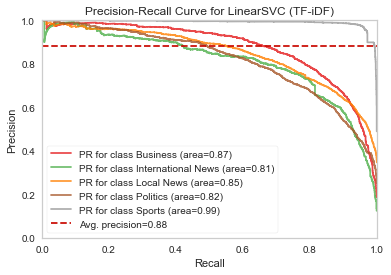

<AxesSubplot:title={'center':'Precision-Recall Curve for LinearSVC (TF-iDF)'}, xlabel='Recall', ylabel='Precision'>

In [308]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    title="Precision-Recall Curve for LinearSVC (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [309]:
save_graph(viz)

../reports/2023-05-02/SVM_prec-recall(88)_6.svg


In [310]:
score 

0.8806944329065057

In [311]:
store_result(method, model_name, y_test, y_pred, score)

## Random Forest

In [312]:
model_name = 'RandomForest'

In [313]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(300, max_depth=15, random_state = 42, n_jobs = -1)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7215241514360313

In [314]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

RandomForest
[[1274    0  419  141    0]
 [  27  249  960   53   20]
 [  94   31 3690  295   25]
 [  95    3 1086 1701   11]
 [   0    0  144    9 1929]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.86      0.69      0.77      1834
International News       0.88      0.19      0.31      1309
        Local News       0.59      0.89      0.71      4135
          Politics       0.77      0.59      0.67      2896
            Sports       0.97      0.93      0.95      2082

          accuracy                           0.72     12256
         macro avg       0.81      0.66      0.68     12256
      weighted avg       0.77      0.72      0.71     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.93      0.73      0.82      7336
International News       0.92      0.21      0.34      5234
        Local News       0.61      0.93      0.74     16539
          Politics       0.84      0.65    

In [315]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = ['Business']
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = RandomForestClassifier(300, max_depth=15, random_state = 42, n_jobs = -1)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

../reports/2023-05-02/RandomForest_prec-recall(86)_7.svg


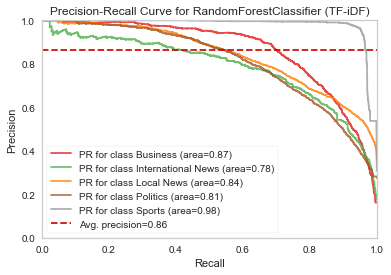

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier (TF-iDF)'}, xlabel='Recall', ylabel='Precision'>

In [316]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    RandomForestClassifier(300, max_depth=15, random_state = 42, n_jobs = -1),
    title="Precision-Recall Curve for RandomForestClassifier (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [317]:
score 

0.8644020097036829

In [318]:
store_result(method, model_name, y_test, y_pred, score)

## Adaboost

In [319]:
model_name = 'Adaboost'

In [320]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators= 500, random_state = 42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.716628590078329

In [321]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

Adaboost
[[1424   20  223  158    9]
 [  31  883  288   83   24]
 [ 433  253 2826  541   82]
 [ 316  140  722 1681   37]
 [   1   15   89    8 1969]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.65      0.78      0.71      1834
International News       0.67      0.67      0.67      1309
        Local News       0.68      0.68      0.68      4135
          Politics       0.68      0.58      0.63      2896
            Sports       0.93      0.95      0.94      2082

          accuracy                           0.72     12256
         macro avg       0.72      0.73      0.72     12256
      weighted avg       0.72      0.72      0.71     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.64      0.78      0.71      7336
International News       0.69      0.69      0.69      5234
        Local News       0.70      0.69      0.69     16539
          Politics       0.68      0.60      0.

In [322]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

../reports/2023-05-02/Adaboost_prec-recall(88)_8.svg


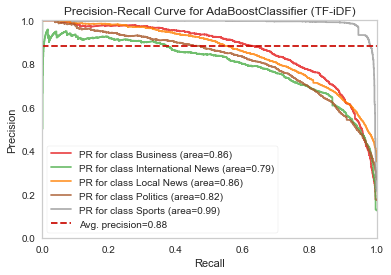

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier (TF-iDF)'}, xlabel='Recall', ylabel='Precision'>

In [323]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    title="Precision-Recall Curve for AdaBoostClassifier (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [324]:
score 

0.8803827713380291

In [325]:
store_result(method, model_name, y_test, y_pred, score)

## XGBoost

In [326]:
model_name = 'XGBoost'

In [327]:
Y2

array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
       'Business'], dtype=object)

In [328]:
np.unique(Y2)

array(['Business', 'International News', 'Local News', 'Politics',
       'Sports'], dtype=object)

In [329]:
d_replace = { "Business": 0,
    "International News": 1,
            "Local News": 2,
              "Politics": 3,
                "Sports": 4,
        # "Entertainment": 5,
        #         "Others": 6 
                }

Y_ = pd.Series(Y2).map(d_replace).to_numpy(dtype=int)
np.unique(Y_)

array([0, 1, 2, 3, 4])

In [330]:
# df = data.copy()

# df.category = Y_
# # df.category = df.category.astype(int)
# df.sample(10)

In [331]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, Y_     , stratify=Y_    , test_size=0.2, random_state=42)

In [332]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state=42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

[06:03:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8347748041775457

In [333]:
print_eval(model_name, classifier, X_train, X_test, y_train, y_test)

XGBoost
[[1506    8  190  127    3]
 [  14 1005  223   61    6]
 [ 161  151 3453  341   29]
 [ 142   77  391 2278    8]
 [   0   11   77    5 1989]]
Test_Set
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1834
           1       0.80      0.77      0.78      1309
           2       0.80      0.84      0.82      4135
           3       0.81      0.79      0.80      2896
           4       0.98      0.96      0.97      2082

    accuracy                           0.83     12256
   macro avg       0.84      0.83      0.84     12256
weighted avg       0.84      0.83      0.83     12256

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7336
           1       0.90      0.89      0.89      5234
           2       0.89      0.92      0.90     16539
           3       0.91      0.90      0.91     11585
           4       0.99      0.97      0.98      8329

    accuracy     

In [334]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = XGBClassifier(random_state=42)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

[06:09:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

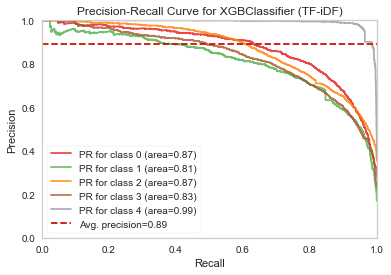

<AxesSubplot:title={'center':'Precision-Recall Curve for XGBClassifier (TF-iDF)'}, xlabel='Recall', ylabel='Precision'>

In [335]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    XGBClassifier(max_depth=3, random_state=42),
    title="Precision-Recall Curve for XGBClassifier (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
save_graph(viz)
viz.show()

In [336]:
score 

0.8907398525833332

In [337]:
store_result(method, model_name, y_test, y_pred, score)

# Models Comparison

In [352]:
def read_results():
    global reports_dir
    file_name = reports_dir + 'Results' + '.csv'
    return pd.read_csv(file_name, index_col=False)

In [348]:
reports_dir

'../reports/2023-05-02/'

In [353]:
results_df = read_results()
results_df       # d = {"Method":[], "Model":[], "Weighted_Accuracy":[], "Prec_Recall_score":[]}

,Method,Model,Weighted_Accuracy,Prec_Recall_score
0,Count_Vectorizer,GaussianNB,0.64,0.487436
1,Count_Vectorizer,Multinomial NB,0.73,0.744579
2,Count_Vectorizer,Logistic Reg,0.80,0.874018
3,Count_Vectorizer,SVM C=1,0.80,0.871092
4,Count_Vectorizer,RandomForest,0.73,0.856840
5,Count_Vectorizer,Adaboost,0.69,0.876293
6,Count_Vectorizer,XGBoost,0.80,0.912734
7,TF-IDF,GaussianNB,0.68,0.514882
8,TF-IDF,MultinomialNB,0.73,0.813872
9,TF-IDF,LogisticReg,0.80,0.876926


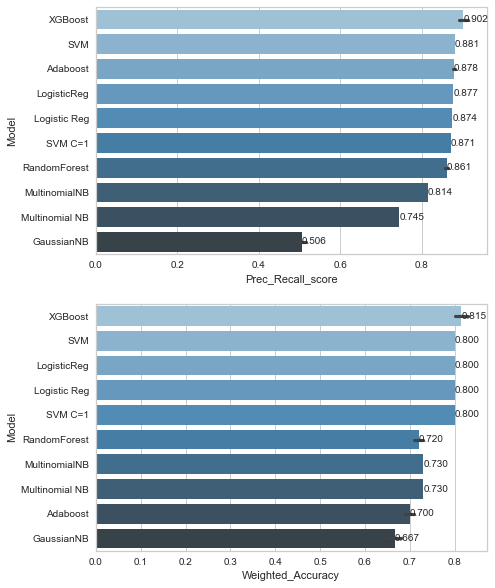

In [354]:
def labels(ax):                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment


plt.figure(figsize=(7,10))

plt.subplot(211)
results_df = results_df.sort_values(by="Prec_Recall_score", ascending=False)
ax=sns.barplot(x="Prec_Recall_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)
# ax.set_title("Performances for feature:" + feature)

plt.subplot(212)
results_df = results_df.sort_values(by="Weighted_Accuracy", ascending=False)
ax=sns.barplot(x="Weighted_Accuracy", y="Model", data=results_df, palette="Blues_d")
labels(ax)

file_path = reports_dir + 'comparison.svg'
plt.savefig(file_path, format='svg')
plt.show();